### Seaborn Versus Matplotlib

In [4]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [5]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500,6), 0)

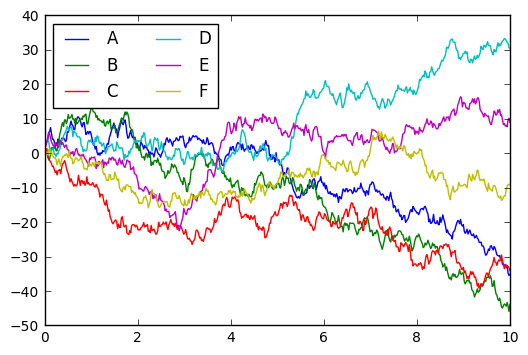

In [6]:
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2,loc='upper left');

In [7]:
import seaborn as sns
sns.set()

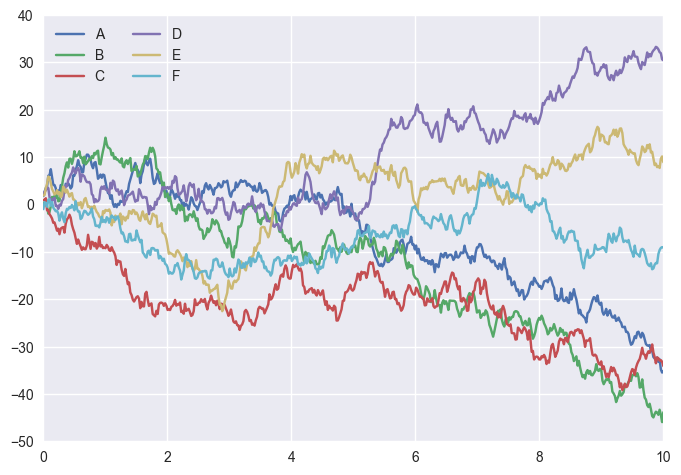

In [8]:
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2,loc='upper left')

#### Histograms, KDE, and densities

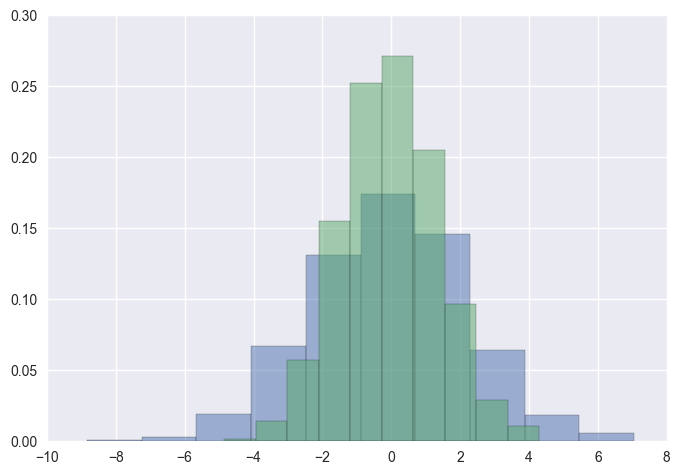

In [9]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

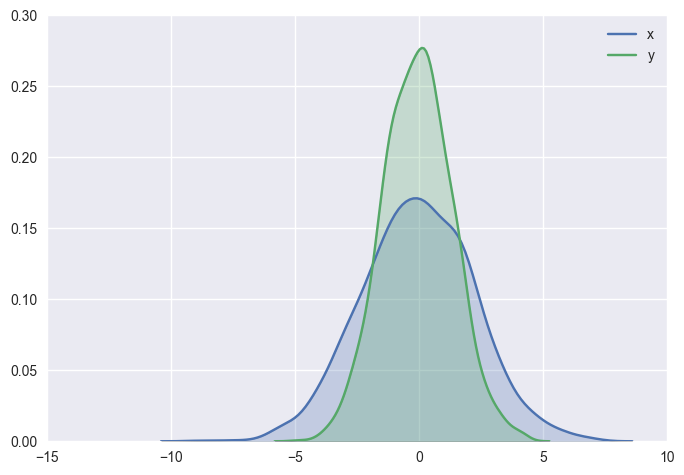

In [10]:
# we can also use a Kernel Density Estimation
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

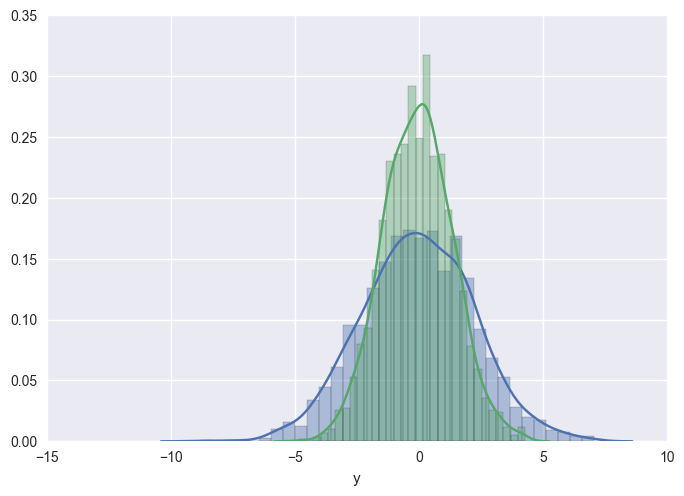

In [11]:
# histograms and Kdes combined
sns.distplot(data['x'])
sns.distplot(data['y'])

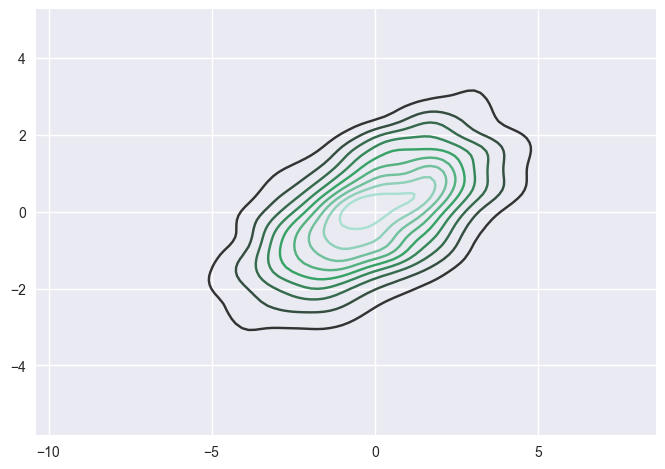

In [12]:
# if we pass the 2-d data  we get a 2-D visualisation
sns.kdeplot(data)

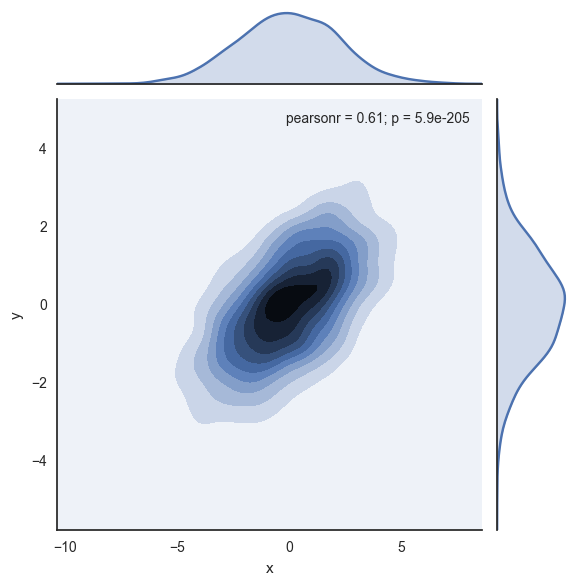

In [13]:
# or
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

IndexError: string index out of range

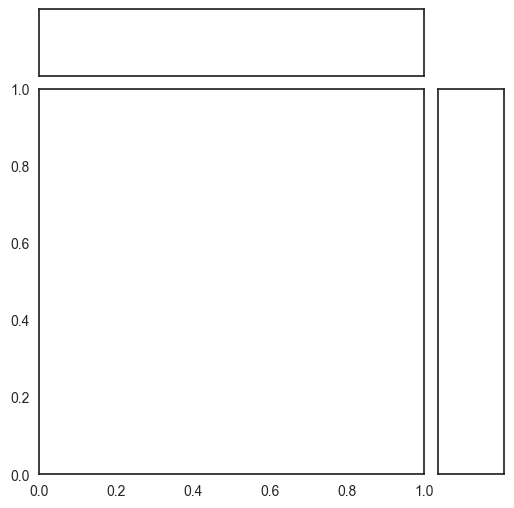

In [14]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', kind='hex')

#### Pair Plots

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

#### Faceted histograms

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
tips['tip_pct'] = 100 *tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0,40, 15));

#### Factor Plots
view the distribution of a parameter within bins defined by any other parameter

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day","total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

#### Joint Distribution

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

In [ ]:
ax = sns.jointplot('total_bill', "tip", data=tips, kind='reg')

#### Bar plots

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                      kind='count', color='steelblue')
    g.set_xticklabels(step=5)

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=3.0, kind='count',
                      hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

### Exploring Marathon Finishing Times

In [ ]:
data = pd.read_csv('../Data/marathon-data.csv')
data.head()

In [ ]:
data.dtypes

In [15]:
import warnings
warnings.filterwarnings('ignore')
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('../Data/marathon-data.csv', 
                  converters={'split': convert_time, 'final':convert_time})

data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [16]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [21]:
# in seconds
data['split_sec'] = data['split'].astype(np.int64)/1E9
data['final_sec'] = data['final'].astype(np.int64)/1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


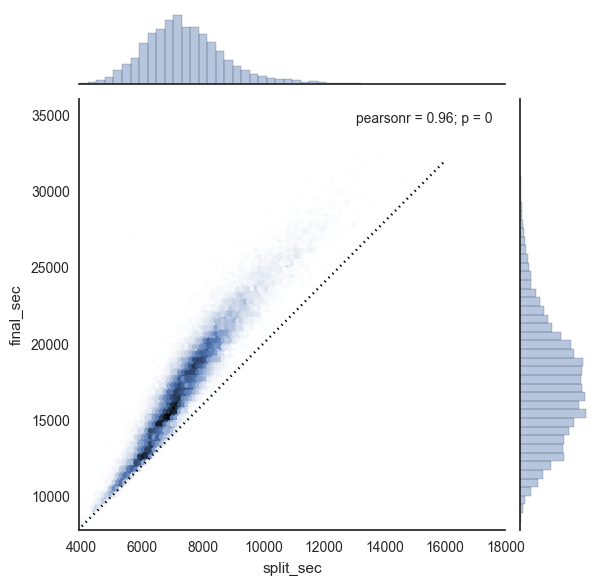

In [26]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                   np.linspace(8000, 32000), ':k')

__measures the degree
to which each runner negative-splits or positive-splits the race__

In [27]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


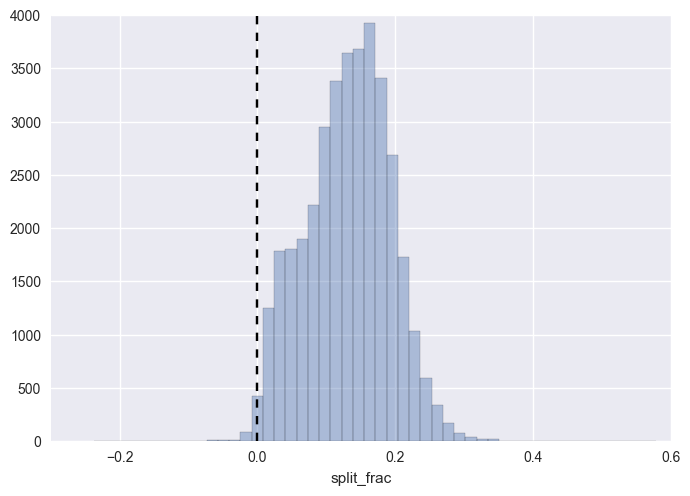

In [30]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color='k', ls='--')

In [31]:
sum(data['split_frac']<0)

251

__whether there is any correlation between this split fraction and other variables.__

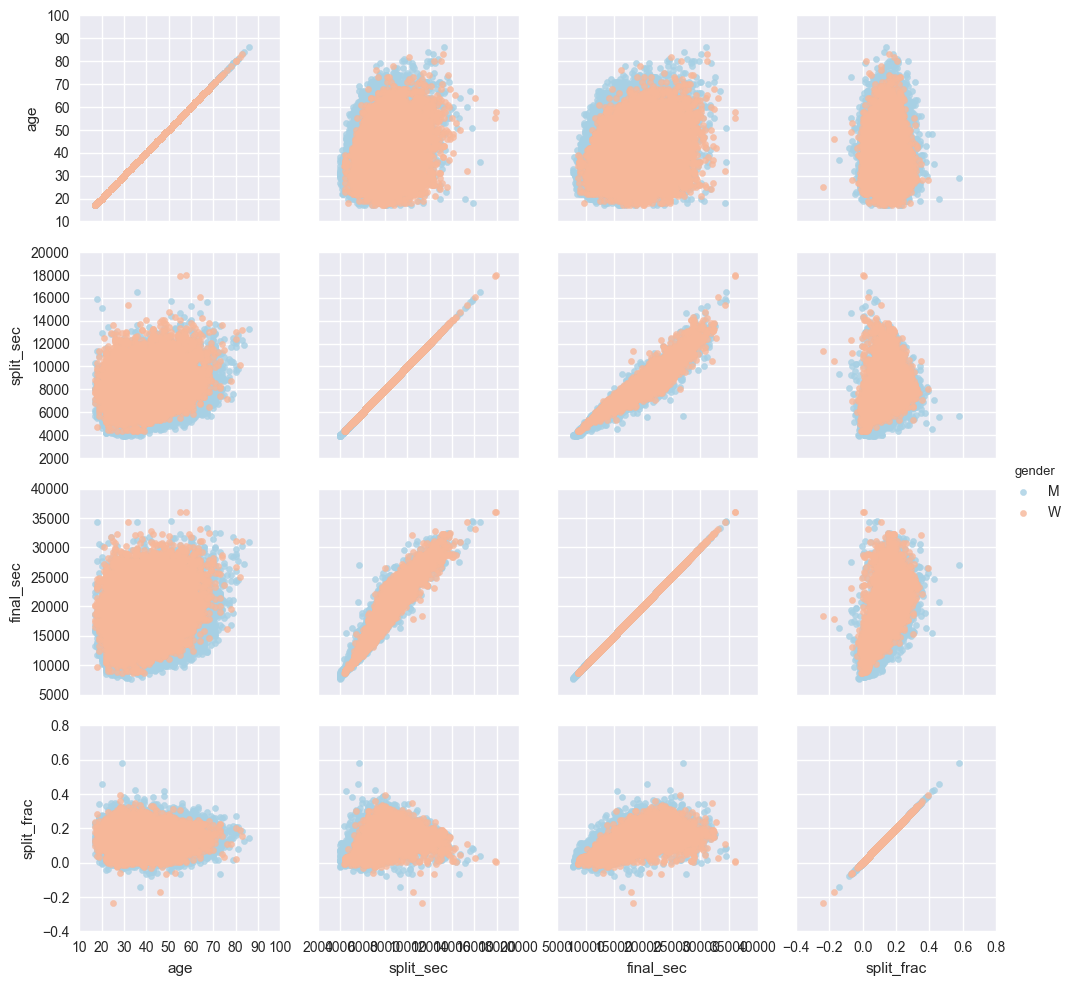

In [34]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

__difference between men and Women__

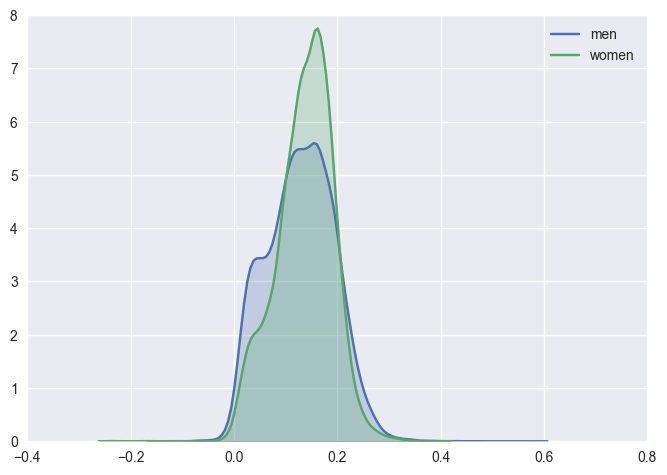

In [38]:
sns.kdeplot(data.split_frac[data.gender == 'M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=1);

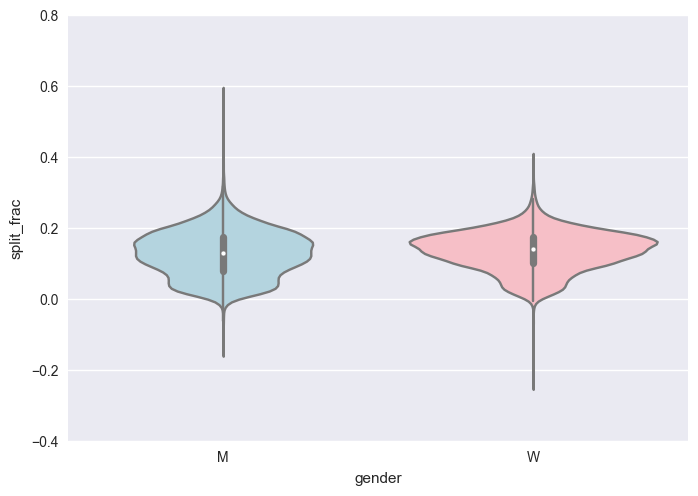

In [39]:
sns.violinplot("gender", "split_frac", data=data,
              palette=["lightblue", "lightpink"]);

In [41]:
# include age
data['age_dec'] = data.age.map(lambda age: 10*(age//10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


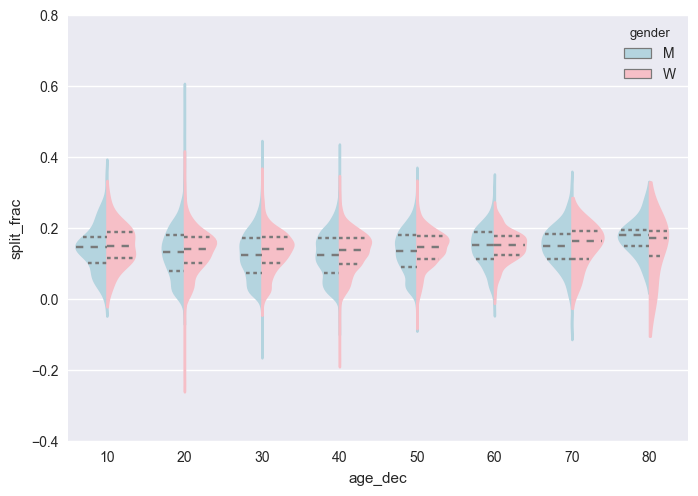

In [46]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                  split=True, inner='quartile',
                  palette=["lightblue", "lightpink"]);

__the split
distributions of men in their 20s to 50s show a pronounced over-density toward
lower splits when compared to women of the same age__

In [48]:
np.sum(data.age > 80)

7

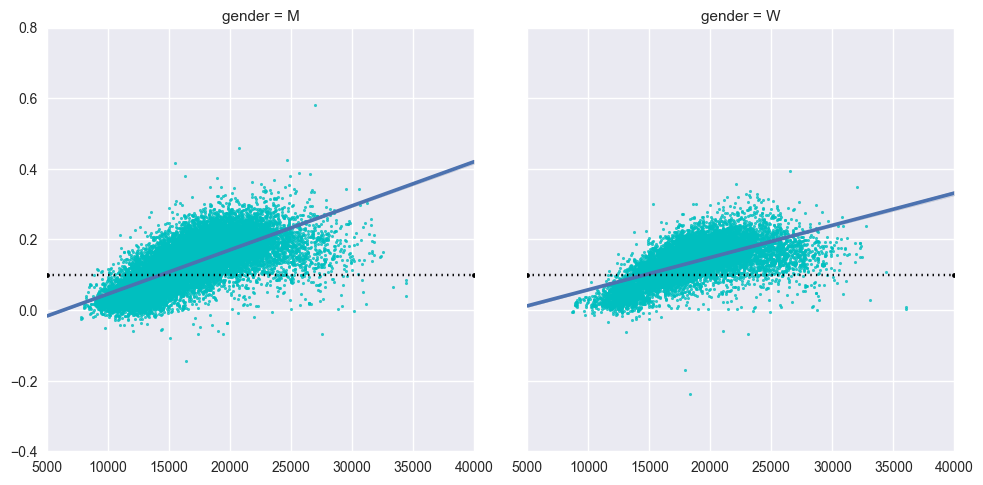

In [50]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
              markers='.', scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color='k', ls=':');